In [33]:
import functions
import numpy as np
import pandas as pd
import protein_contact_map
import matplotlib.pyplot as plt

In [97]:
def pdb_to_adjacency(pdb_file: str) -> tuple:
    """
    Convert given PDB file to an adjacency matrix
    @param pdb_file: PDB file from RCSB or AlphaFold in each length range
    @return: tuple of the adjacency and distance matrices as numpy arrays
    """
    pcm = protein_contact_map.ProteinContactMap(pdb_file, default_threshold=21)
    alpha_carbons = pcm.get_alpha_carbons
    distance_array = protein_contact_map.get_distance_array(alpha_carbons)
    distance_matrix = protein_contact_map.get_distance_matrix(alpha_carbons, distance_array)
    adjacency_matrix = pcm.get_adjacency_matrix(alpha_carbons, distance_array)
    return distance_matrix, adjacency_matrix

In [98]:
def return_distance_histogram(log_file: str, given_algorithm: str, length_range: str, path_to_csvs: str) -> np.ndarray:
    """
    Compute the amino acid distance distribution for PDB files in given range from adjacency matrix
    and save in a numpy file.
    @param log_file: file to save exceptions in
    @param given_algorithm: alpha or rcsb
    @param length_range: 100, 200 or 300
    @param path_to_csvs: full path to csv files
    @return: None
    """
    dataframe = pd.read_csv(path_to_csvs)
    pdb_files = dataframe["filename"].to_numpy()
    histogram_list = []
    counter = 1
    with open(log_file, "w") as log_file:
        for pdb_file in pdb_files:
            # print(f"Progress: {counter}/{len(pdb_files)}")
            if given_algorithm == "alpha":
                clean_pdb_filename = pdb_file.replace("/home/jguven/Projects/sequence_distance_distribution", "..")
            else:
                clean_pdb_filename = pdb_file
            try:
                adjacency_matrix = pdb_to_adjacency(clean_pdb_filename)[1]
                distances = functions.get_distances(adjacency_matrix)
                # bins = np.linspace(start=1, stop=200, num=100)
                bins = np.linspace(start=1, stop=350, num=350)
                histogram = np.histogram(distances, bins=bins, density=False)[0]
                histogram_list.append(histogram)
                counter += 1
            except FileNotFoundError:
                traceback.print_exc(file=log_file)
    histogram_array = np.asarray(histogram_list)
    if not histogram_list:
        print("Warning: Histogram list is empty. Check log file.")
    if given_algorithm == "alpha":
        np.save(f"histogram_alpha_{length_range}_20.npy", histogram_array)
    elif given_algorithm == "rcsb":
        np.save(f"histogram_{length_range}_20.npy", histogram_array)



# 300

In [91]:
return_distance_histogram(log_file="log.txt", given_algorithm="rcsb", length_range="300", path_to_csvs="../data/rcsb/secondary_structures_300.csv")

In [92]:
return_distance_histogram(log_file="log.txt", given_algorithm="alpha", length_range="300", path_to_csvs="../data/alphafold/unique_secondary_structures_300.csv")

In [130]:
# threshold 21 Å
hist = np.load("histogram_300_20.npy", allow_pickle=True)
# Threshold 15 Å
hist_15 = np.load("histogram_300_15.npy", allow_pickle=True)
alpha_15 = np.load("histogram_alpha_300_15.npy", allow_pickle=True)
# Threshold 10 Å
hist_10 = np.load("histogram_300_10.npy", allow_pickle=True)
# Threshold 8 Å
histogram_300 = np.load("../data/rcsb/histogram_300_not_normed.npy", allow_pickle=True)
# 300 3D simulation
simulation_300 = np.load("../data/simulations/3d/histogram_300_not_normed.npy", allow_pickle=True)

In [131]:
mean = np.mean(hist, axis=0)
normed_mean_new_300 = mean / np.sum(mean)

mean_10 = np.mean(hist_10, axis=0)
normed_mean_10 = mean_10 / np.sum(mean_10)

mean_15 = np.mean(hist_15, axis=0)
normed_mean_15 = mean_15 / np.sum(mean_15)

alpha_mean_15 = np.mean(alpha_15, axis=0)
normed_alpha_mean_15 = alpha_mean_15 / np.sum(alpha_mean_15)

sim_mean_300 = np.mean(simulation_300, axis=0)
normed_sim_mean_300 = sim_mean_300 / np.sum(sim_mean_300)

mean_300 = np.mean(histogram_300, axis=0)
normed_mean_300 = mean_300 / np.sum(mean_300)


distances = np.linspace(1, 350, 350)[:-1]

(0.0001, 0.19)

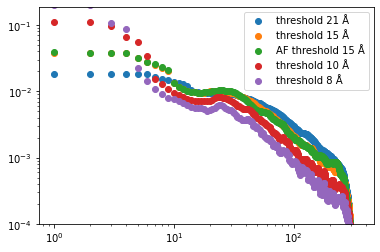

In [132]:
plt.scatter(distances, normed_mean_new_300, label="threshold 21 Å")
plt.scatter(distances, normed_mean_15, label="threshold 15 Å")
plt.scatter(distances, normed_alpha_mean_15, label="AF threshold 15 Å")
plt.scatter(distances, normed_mean_10, label="threshold 10 Å")
plt.scatter(distances, normed_mean_300, label="threshold 8 Å")
# plt.scatter(distances, normed_sim_mean_300, label="3D simulation")
plt.loglog()
plt.legend()
plt.ylim(0.0001,0.19)
# plt.xlim(3, 15)

# 200

In [99]:
return_distance_histogram(log_file="log.txt", given_algorithm="rcsb", length_range="200", path_to_csvs="../data/rcsb/secondary_structures_200.csv")

In [125]:
# threshold 21 Å
hist = np.load("histogram_200_20.npy", allow_pickle=True)
histogram_200 = np.load("../data/rcsb/histogram_200_not_normed.npy", allow_pickle=True)
simulation_200 = np.load("../data/simulations/3d/histogram_200_not_normed.npy", allow_pickle=True)
mean = np.mean(hist, axis=0)
normed_mean_new_200 = mean / np.sum(mean)
mean_200 = np.mean(histogram_200, axis=0)
normed_mean_200 = mean_200 / np.sum(mean_200)
sim_mean_200 = np.mean(simulation_200, axis=0)
normed_sim_mean_200 = sim_mean_200 / np.sum(sim_mean_200)
distances = np.linspace(1, 350, 350)[:-1]

(0.0001, 0.19)

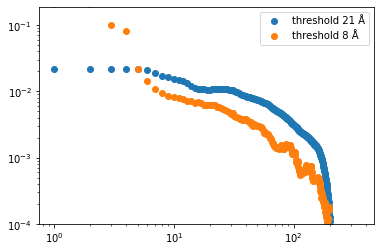

In [126]:
plt.scatter(distances, normed_mean_new_200, label="threshold 21 Å")
plt.scatter(distances, normed_mean_200, label="threshold 8 Å")
# plt.scatter(distances, normed_sim_mean_200, label="3D simulation")
plt.loglog()
plt.legend()
plt.ylim(0.0001,0.19)

# 100

In [109]:
return_distance_histogram(log_file="log.txt", given_algorithm="rcsb", length_range="100", path_to_csvs="../data/rcsb/secondary_structures_100.csv")

In [123]:
# threshold 21 Å
hist = np.load("histogram_100_20.npy", allow_pickle=True)
histogram_100 = np.load("../data/rcsb/histogram_100_not_normed.npy", allow_pickle=True)
simulation_100 = np.load("../data/simulations/3d/histogram_100_not_normed.npy", allow_pickle=True)
mean = np.mean(hist, axis=0)
normed_mean_new_100 = mean / np.sum(mean)
mean_100 = np.mean(histogram_100, axis=0)
normed_mean_100 = mean_100 / np.sum(mean_100)
sim_mean_100 = np.mean(simulation_100, axis=0)
normed_sim_mean_100 = sim_mean_100 / np.sum(sim_mean_100)
distances = np.linspace(1, 350, 350)[:-1]

(0.0001, 0.19)

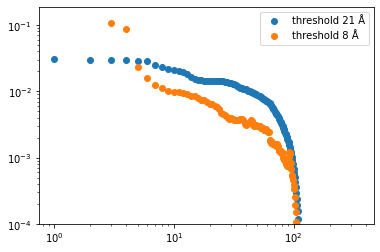

In [124]:
plt.scatter(distances, normed_mean_new_100, label="threshold 21 Å")
plt.scatter(distances, normed_mean_100, label="threshold 8 Å")
# plt.scatter(distances, normed_sim_mean_100, label="3D simulation")

plt.loglog()
plt.legend()
plt.ylim(0.0001,0.19)

# Compare

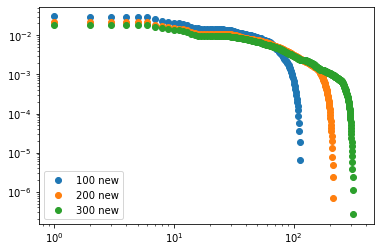

In [133]:
plt.scatter(distances, normed_mean_new_100, label="100 new")
plt.scatter(distances, normed_mean_new_200, label="200 new")
plt.scatter(distances, normed_mean_new_300, label="300 new")
plt.loglog()
plt.legend()

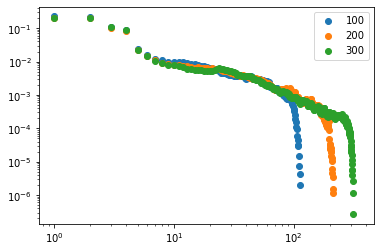

In [134]:
plt.scatter(distances, normed_mean_100, label="100")
plt.scatter(distances, normed_mean_200, label="200")
plt.scatter(distances, normed_mean_300, label="300")
plt.loglog()
plt.legend()